# This code finds the average lick rate per second and plots it against time 

I want to plot the average lick rate against time to see if the duration before they start anticipatorily licking is fixed between trials or if it is a matter if distance passed

In [1]:
import pandas as pd
df = pd.read_csv('wfC318/Day_0/Raw_files_csv/combined_behavior_and_s.csv', header=None)

#adding labels to the data
labs = ['frame', 'time', 'odor_valve', 'total_licks', 'total_rewards', 'trial', 
        'valve_open', 'virt_dist', 'total_distance', 'lap', 'trial_type', 'speed']

#name the rest of the columns with neuron index
for i in range(0,255):
    labs.append(str(i))
    
df.columns = labs
print(df.head())


   frame  time  odor_valve  total_licks  total_rewards  trial  valve_open  \
0      1    34           0            0              0      0           0   
1      2    84           0            0              0      0           0   
2      3   133           0            0              0      0           0   
3      4   183           0            0              0      0           0   
4      5   233           0            0              0      0           0   

   virt_dist  total_distance  lap ...   245     246  247  248  249  250  251  \
0         13               0    0 ...   0.0  0.0000  0.0  0.0  0.0  0.0  0.0   
1         26               0    0 ...   0.0  2.7654  0.0  0.0  0.0  0.0  0.0   
2         36               0    0 ...   0.0  0.0000  0.0  0.0  0.0  0.0  0.0   
3         50               0    0 ...   0.0  0.0000  0.0  0.0  0.0  0.0  0.0   
4         65               0    0 ...   0.0  0.0000  0.0  0.0  0.0  0.0  0.0   

   252  253  254  
0  0.0  0.0  0.0  
1  0.0  0.0  0.0  

In [2]:
#remove all trials after 30
df = df[df["trial"] < 31]

#restart time so it increments within a given trial only
#do not run this cell more than once or it will fuck everything up
trial_prev, time_prev, end_time = 0,0,0
for i, j in df.iterrows(): 
    trial = int(j['trial'])
    time = int(j['time'])
    if trial != trial_prev:
        end_time = time_prev
        #print("\n")
    df.at[i,'time'] = time - end_time
    trial_prev = trial
    time_prev = time

In [55]:
import pandas as pd
import numpy as np
import time as t
import matplotlib.pyplot as plt

# Things to set:
#filename = 'wfC318/Day_4/raw_files_csv/combined_behavior_and_s_COPY.csv'
filename4 = 'wfC318/Day_4/raw_files_csv/combined_behavior_and_s.csv'
filename0 = 'wfC318/Day_0/Raw_files_csv/combined_behavior_and_s.csv'

# How many trials we are looking at (ex: 31 for day 0, 34 for day 4)
#trial_count = 31



# Day 0
data = pd.read_csv(filename0, header=None)
# Day 4
data4 = pd.read_csv(filename4, header=None)


def changeTime(data_name):
    trial_prev, time_prev, end_time = 0,0,0
    for i, j in data_name.iterrows():
        trial = int(j[9])
        time = int(j[1])
        if trial != trial_prev:
            end_time = time_prev
        data_name.at[i,1] = time - end_time
        trial_prev = trial
        time_prev = time
    print("time changed")
    
changeTime(data)
changeTime(data4)


length = len(data)
data = data[data[7] <= 4000]  # removing all rows where mouse is licking reward past 4000cm
data4 = data4[data4[7] <= 4000]  # removing all rows where mouse is licking reward past 4000cm

time = data[1]
odor = data[10]
distance = data[7]
lap = data[9]
lap4 = data4[9]
lick = data[3]

trial_count = 30#max(lap)  # all of them
trial_count4 = 30#max(lap4)  # all of them


lap_dictionary = {}
for i in range(0, trial_count):  # for every lap
    lap_dictionary[i] = data.loc[data[9] == i]  # associate all lap data with that lap

lap_dictionary4 = {}
for i in range(0, trial_count4):  # for every lap
    lap_dictionary4[i] = data4.loc[data4[9] == i]  # associate all lap data with that lap

    
def lengthOfTrial(lap_dictionary):
    durations = []
    licks = []
    for i in lap_dictionary:
        first = lap_dictionary[i].iloc[0]
        last = lap_dictionary[i].iloc[-1]
        duration = last[1] - first[1]
        lick_count = last[3] - first[3] 
        # NOTE: "last" is the last row before the mouse reaches the reward,
        # Therefore, lick_count will not include licks that take place during reward period
        durations.append(duration)
        licks.append(lick_count)
    return durations, licks

# Day 0
durations, licks = lengthOfTrial(lap_dictionary)
print("durations", durations, "\nlicks", licks)

# Day 4
durations4, licks4 = lengthOfTrial(lap_dictionary4)
print("durations", durations4, "\nlicks", licks4)



def findShortestAndFastestTrial(lap_dictionary):
    min_time = 999999999
    max_time = 0
    shortest_trial = lap_dictionary[0]
    longest_trial = lap_dictionary[0]
    time_list = []
    for trial in lap_dictionary:
        #pair = lap_dictionary[trial].iloc[[0, -1]]
        first = lap_dictionary[trial].iloc[0]
        last = lap_dictionary[trial].iloc[-1]

        time = last[1] - first[1]
        time_list.append(time)

        if(time < min_time):
            min_time=time
            shortest_trial = trial
        if (time > max_time):
            max_time = time
            longest_trial = trial

    #print("AVG trial duration:", sum(time_list)/len(time_list))
    return shortest_trial, min_time, longest_trial, max_time

shortest_trial, min_time,longest_trial, max_time = findShortestAndFastestTrial(lap_dictionary)
print("\nDAY 0:\nShortest Trial:", shortest_trial, "Time: ", min_time)
print("Longest Trial:", longest_trial, "Time: ", max_time)

shortest_trial4, min_time4,longest_trial4, max_time4 = findShortestAndFastestTrial(lap_dictionary4)
print("DAY 4:\nShortest Trial:", shortest_trial4, "Time: ", min_time4)
print("Longest Trial:", longest_trial4, "Time: ", max_time4)


# Determining number of bins
num_of_time_bins = int(min_time // 200) # 200ms bins 
num_of_space_bins = 4000//100 # 100cm bin width 
print("\nDay 0, number of time bins:", num_of_time_bins)

num_of_time_bins4 = int(min_time4 // 200) # 200ms bins 
num_of_space_bins4 = 4000//100 # 100cm bin width 
print("Day 4, number of time bins:", num_of_time_bins4)


NEW_lap_dictionary = {}
for i in range(0, trial_count):
    NEW_lap_dictionary[i] = data.loc[data[9] == i]  # associate all lap data with that lap

NEW_lap_dictionary4 = {}    
for i in range(0, trial_count4):
    NEW_lap_dictionary4[i] = data4.loc[data4[9] == i]


    
def timeBinning(NEW_lap_dictionary):
    # each key value pair will be (Trial_number, [ [Bin1], [Bin2], [Bin3], ..., [Bin43] ])
    dict_of_all_bins = {}
    for i in NEW_lap_dictionary:  # for every trial
        list_of_bins = {}  # each (key,value) pair will be start-time of bin and list of points in bin for each trial
        # indexed from 1
        for bin_number in range(1, num_of_time_bins+1):
            bin_ending_time = bin_number*200
            last_time = (bin_number-1)*200
            # add all data points from the current trial in lap_dictionary to bin if time is in bin range
            data_points = NEW_lap_dictionary[i].loc[(NEW_lap_dictionary[i][1] < bin_ending_time) & (NEW_lap_dictionary[i][1] >= last_time) ]
            list_of_bins[bin_ending_time] = data_points
        dict_of_all_bins[i] = list_of_bins
    return dict_of_all_bins

time_binned_dictionary = timeBinning(NEW_lap_dictionary)
print("\nDay 0: temporally binned dictionary")

time_binned_dictionary4 = timeBinning(NEW_lap_dictionary4)
print("Day 4: temporally binned dictionary")

def spaceBinning():
     # each key value pair will be (Trial_number, [ [Bin1], [Bin2], [Bin3], ..., [Bin43] ])
    dict_of_all_bins = {}
    for i in NEW_lap_dictionary:  # for every trial
        list_of_bins = {}  # each (key,value) pair will be start-time of bin and list of points in bin for each trial
        # indexed from 1
        for bin_number in range(1, num_of_space_bins+1):
            bin_starting_dist = bin_number*100  # 10 cm bin width
            last_dist = (bin_number-1)*100
            # add all data points from the current trial in lap_dictionary to bin if time is in bin range
            data_points = NEW_lap_dictionary[i].loc[(NEW_lap_dictionary[i][7] < bin_starting_dist) & (NEW_lap_dictionary[i][7] >= last_dist) ]
            list_of_bins[bin_starting_dist] = data_points
        dict_of_all_bins[i] = list_of_bins
    return dict_of_all_bins

#space_binned_dictionary = spaceBinning()
#print("spatially binned dictionary")


time changed
time changed
durations [12652.0, 11803.0, 9802.0, 14753.0, 12003.0, 11204.0, 13452.0, 10553.0, 9103.0, 12453.0, 11352.0, 12203.0, 12002.0, 11052.0, 9801.0, 12703.0, 11105.0, 9700.0, 10652.0, 9303.0, 16705.0, 12403.0, 11803.0, 12503.0, 10353.0, 13001.0, 9651.0, 9203.0, 10202.0, 8702.0] 
licks [11.0, 13.0, 10.0, 30.0, 8.0, 10.0, 18.0, 10.0, 5.0, 28.0, 23.0, 21.0, 27.0, 18.0, 10.0, 20.0, 14.0, 15.0, 19.0, 6.0, 40.0, 29.0, 20.0, 23.0, 17.0, 31.0, 8.0, 12.0, 21.0, 10.0]
durations [8950.0, 7702.0, 7453.0, 8950.0, 6901.0, 7602.0, 9352.0, 7952.0, 7453.0, 8501.0, 8552.0, 8401.0, 9303.0, 8652.0, 8203.0, 7702.0, 8100.0, 8301.0, 8853.0, 7701.0, 7851.0, 8451.0, 8401.0, 7951.0, 8902.0, 7651.0, 7753.0, 8902.0, 10252.0, 11401.0] 
licks [26.0, 10.0, 10.0, 16.0, 5.0, 12.0, 15.0, 11.0, 8.0, 17.0, 14.0, 12.0, 25.0, 8.0, 10.0, 7.0, 11.0, 14.0, 16.0, 9.0, 12.0, 15.0, 10.0, 11.0, 16.0, 5.0, 4.0, 19.0, 17.0, 22.0]

DAY 0:
Shortest Trial: 29 Time:  8702.0
Longest Trial: 20 Time:  16705.0
DAY 4:
Sh

## Plotting Here

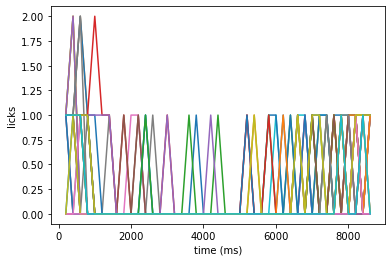

Licks occuring in 200ms bins accross all trials (Day 0, Trial Count: 30 )




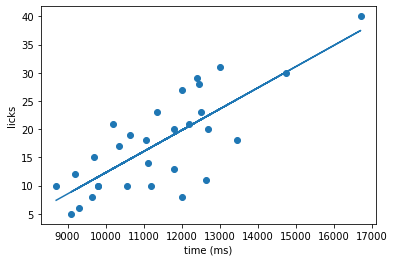

Duration of trial vs licks across all trials (Day 0, Trial Count: 30 




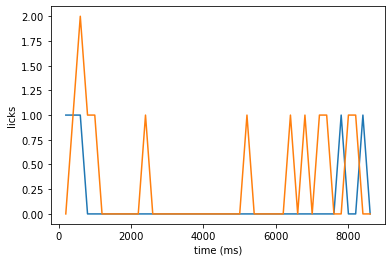

Slow vs Fast trial, licks occuring in 200ms bins accross all trials 
(Day 0, Trial Count: 30 )




In [72]:
##############################
#                            #
#      Plotting here         #
#                            #
##############################
"""
for trial in time_binned_dictionary:
    licksY = []
    timeX = []
    for bin in time_binned_dictionary[trial]:
        currBin = time_binned_dictionary[trial][bin]
        lick_count = currBin.iloc[-1][3] - currBin.iloc[0][3]
        licksY.append(lick_count)
        timeX.append(bin)
        #print(lick_count, bin)
    x = np.array(timeX)
    y = np.array(licksY)
    plt.plot(x, y)
plt.xlabel("time (ms)")
plt.ylabel("licks")
plt.show()
"""

def plot1(time_binned_dictionary, printFlag):
    #print("YOYO", len(time_binned_dictionary))
    for trial in time_binned_dictionary:
        if printFlag:
            print("HEYHEY", len(time_binned_dictionary[trial]))
            print(trial)
        licksY = []
        timeX = []
        counter = 0
        for bin in time_binned_dictionary[trial]:
            currBin = time_binned_dictionary[trial][bin]
            if printFlag:
                print(counter)
            counter+=1
            if printFlag:
                print(currBin)
            first = currBin.iloc[0][3]
            last = currBin.iloc[-1][3]
            lick_count = last - first
            licksY.append(lick_count)
            timeX.append(bin)
            #print(lick_count, bin)
        x = np.array(timeX)
        y = np.array(licksY)
        plt.plot(x, y)
    plt.xlabel("time (ms)")
    plt.ylabel("licks")
    plt.show()

plot1(time_binned_dictionary, printFlag=False)
print("Licks occuring in 200ms bins accross all trials (Day 0, Trial Count:", trial_count,")\n\n")

#plot1(time_binned_dictionary4, printFlag=True)
#print("Licks occuring in 200ms bins accross all trials (Day 4, Trial Count:", trial_count,")\n\n")

def dur(durations, licks):
    # plots duration of trial vs licks
    x = np.array(durations)
    y = np.array(licks)
    m, b = np.polyfit(x, y, 1)
    plt.scatter(x, y, marker='o')
    plt.plot(x, m*x + b)
    plt.xlabel("time (ms)")
    plt.ylabel("licks")
    plt.show()

dur(durations, licks)
print("Duration of trial vs licks across all trials (Day 0, Trial Count:", trial_count,"\n\n")

def plotFastVSlow(shortest_trial, min_time, longest_trial, max_time, time_binned_dictionary):
    trials=[shortest_trial,longest_trial]    
    for trial in trials:
        licksY = []
        timeX = []
        counter = 0
        for bin in time_binned_dictionary[trial]:
            currBin = time_binned_dictionary[trial][bin]
            #print(counter)
            counter+=1
            first = currBin.iloc[0][3]
            last = currBin.iloc[-1][3]
            lick_count = last - first
            licksY.append(lick_count)
            timeX.append(bin)
            #print(lick_count, bin)
        x = np.array(timeX)
        y = np.array(licksY)
        plt.plot(x, y)
    plt.xlabel("time (ms)")
    plt.ylabel("licks")
    plt.show()

plotFastVSlow(shortest_trial, min_time, longest_trial, max_time, time_binned_dictionary)
print("Slow vs Fast trial, licks occuring in 200ms bins accross all trials \n(Day 0, Trial Count:", trial_count,")\n\n")

#plotFastVSlow(shortest_trial4, min_time4, longest_trial4, max_time4, time_binned_dictionary4)
#print("Slow vs Fast trial, licks occuring in 200ms bins accross all trials \n(Day 4, Trial Count:", trial_count,")\n\n")



def cumulative(time_binned_dictionary):
    for trial in time_binned_dictionary:
        licksY = []
        timeX = []
        counter = 0
        for bin in time_binned_dictionary[trial]:
            currBin = time_binned_dictionary[trial][bin]
            #first = currBin.iloc[0][3]
            licks = currBin.iloc[:,3].mean()
            #last = currBin.iloc[-1][3]
            #lick_count = last - first
            licksY.append(licks)
            timeX.append(bin)
            #print(lick_count, bin)
        x = np.array(timeX)
        y = np.array(licksY)
        plt.plot(x, y)
    plt.xlabel("time (ms)")
    plt.ylabel("licks total")
    plt.show()

#cumulative(time_binned_dictionary)
#print("Total licks in 200ms bins accross all trials \n(Day 0, Trial Count:", trial_count,")\n\n")



    
    
#bin the trial 
#find the average lick per second over the trial 
#Plot line graph of average licks per second against time bin 


#(pick a fast and slow trial and compare results)


#bin in 200ms bins 
#num_of_bins = int(time // 200)
#print("number of bins:", num_of_bins)


#find amount of licks per bin  and store as variable 
#def lick_time (total licks, time):

    # plot the data
    #data.iloc[0:581]. plt.plot(time, lick, alpha=0.4, label="no odor")
    #plt.legend()
 
    # show the plot
    #plt.show()
 
    #return "Done!"



#plot as y axis 
    #find delta lick in 200ms 
    #divide by 
#licks per milisecond 
#find delta licks and divide by number of seconds that have passed 
#time bins of 200ms 

